In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import gym
import numpy as np
import matplotlib.pyplot as plt
from env import Connect4env
import torch
import torch.nn as nn
import sys
from agents import DQN_CNN_agent
env=Connect4env()
l,s=env.reset()

agent1=DQN_CNN_agent(env,batch_size=128)
agent2=DQN_CNN_agent(env,batch_size=128)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
def train_agents_dqn(env:Connect4env,agent1:DQN_CNN_agent,agent2:DQN_CNN_agent,max_episodes:int):

    full_rewards={1:[0],2:[0]}
    for ep in range(max_episodes):

        agent1.reset() # reset the epsilons
        agent2.reset()
        
        state,legal_moves=env.reset()
        winner=-1

        while winner==-1:
            if legal_moves ==[]:
                break

        
            player=env.current_player
            current_agent=agent2 if player==2 else agent1
            action = current_agent.select_action(state, legal_moves)  # Agent take an action based on the model
            next_state, rewards, legal_moves, winner = env.step(action) 
            

            reward=rewards[player]

            # it stores experience and when there is enough it update its parameter by gradient descent

            current_agent.step(state,action,reward,next_state,winner)

            state=next_state

        for p in [1, 2]:
            full_rewards[p].append(full_rewards[p][-1] + rewards[p])

        if ep % 10000 == 0:
            print("\rEpisode {}/{}.".format(ep, max_episodes), end="")
            sys.stdout.flush()
        
    return full_rewards
        

In [3]:
full_r=train_agents_dqn(env,agent1,agent2,1000)

Episode 0/1000.

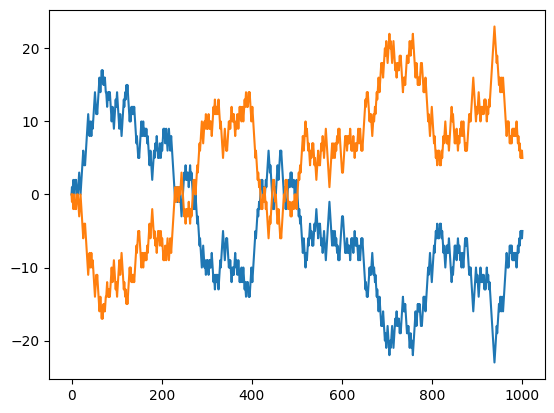

In [4]:
plt.plot(full_r[1])
plt.plot(full_r[2])